CSV Header: ['0.562645435333252', '1.460015058517456', '-1.459067702293396', '0.7708427309989929', '1.2735414827689158', '-2.1197110170574094', '65.78070606759758', '-0.3072007518643513', '0.15702655967886003', '0', '0.30000000000000004', '2.9984104366819735', '0.11271147680015575', '1.8', '2.4254129748833426']


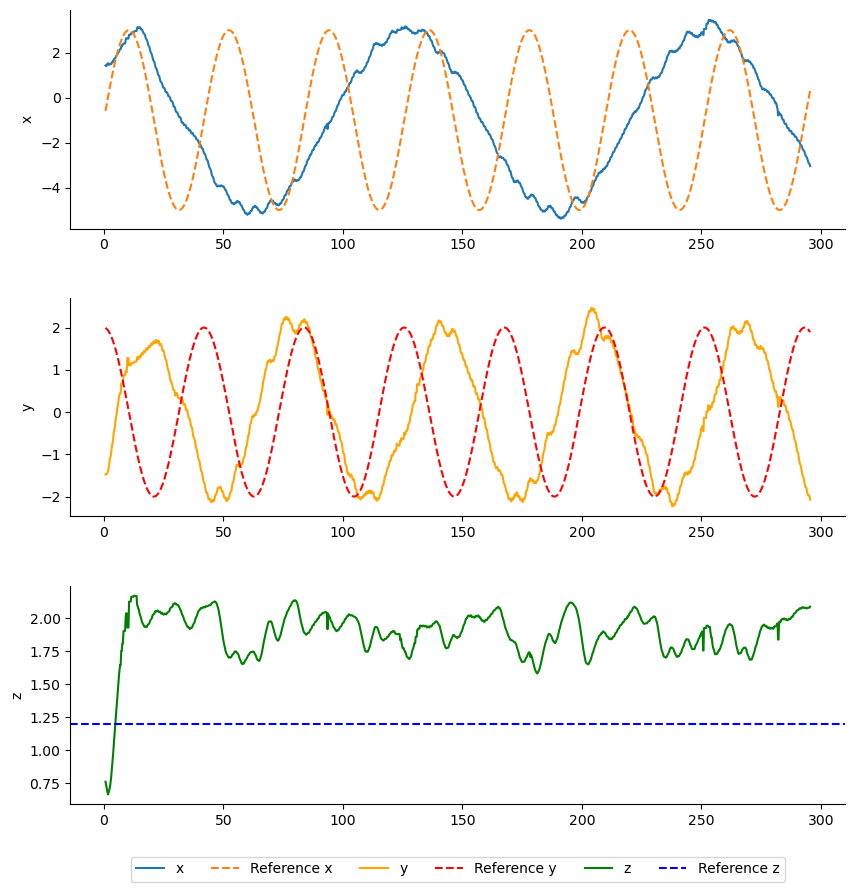

In [23]:
import os
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

input_folder_path = "/Users/leonardo/Documents/Jupyter_Notebook_Workspace/Tracking_Data_Plotting/Data/"
csv_filename = "globalTrack2023_08_28_15_04_13_20_.csv"  # Replace with the actual CSV filename

csv_file_path = os.path.join(input_folder_path, csv_filename)

def get_column_values(row, column_indices):
    return [float(value) for value in row]

target_column_indices = [0, 1, 2, 3]  # Adjust these indices based on your header

with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)[0].split()  # Split the header into individual column names
    print("CSV Header:", header)  # Print header for debugging

    time_values, x_values, y_values, z_values = [], [], [], []

    for row in csv_reader:
        values = row[0].split()  # Split the row into individual values
        data = get_column_values(values, target_column_indices)

        time_values.append(data[0])
        x_values.append(data[1])
        y_values.append(data[2])
        z_values.append(data[3])



# Create subplots using GridSpec
fig = plt.figure(figsize=(10, 12))
gs = GridSpec(4, 1, figure=fig, height_ratios=[3, 3, 3, 0.5], hspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax_legend = fig.add_subplot(gs[3, 0])

# Define the radius and shifts
radius = 2
x_shift = -1
y_shift = 0

# Plot x and y data with reference
ax1.plot(time_values, x_values, label='x')
ax1.plot(time_values, x_shift + 2*radius * np.sin(0.15 * np.array(time_values)), label='Reference x', linestyle='dashed')

ax1.set_ylabel('x')

ax2.plot(time_values, y_values, label='y', color='orange')
ax2.plot(time_values, y_shift + radius * np.sin(0.15 * np.array(time_values) + math.pi/2), label='Reference y', linestyle='dashed', color='red')
ax2.set_ylabel('y')

# Plot z data and reference
ax3.plot(time_values, z_values, label='z', color='green')
ax3.axhline(y=1.2, color='blue', linestyle='dashed', label='Reference z')  # Add a horizontal line at y=1.2
ax3.set_ylabel('z')

# Remove top and right spines from all subplots
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Create a single legend below the subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines.extend(lines2)
lines.extend(lines3)
labels.extend(labels2)
labels.extend(labels3)
ax_legend.legend(lines, labels, loc='upper center', ncol=len(lines))

# Hide ax_legend
ax_legend.axis('off')

# Adjust layout to add spacing between legend and x-axis title
plt.subplots_adjust(bottom=0.1, top=0.85, hspace=0.4)

# Manually adjust the position of the legend
box = ax_legend.get_position()
ax_legend.set_position([box.x0, box.y0 + 0.02, box.width, box.height])

# Save the main figure to a PNG file with 200 DPI
output_main_png_path = "/Users/leonardo/Documents/Jupyter_Notebook_Workspace/Tracking_Data_Plotting/Data/main_figure_lissajous.png"
plt.savefig(output_main_png_path, dpi=200, bbox_inches='tight')

# ...

# Plot x vs y
fig_x_vs_y = plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='x vs y', color='purple')
plt.plot(x_shift + radius * np.cos(0.15 * np.array(time_values)), y_shift + radius * np.sin(0.15 * np.array(time_values)), label='Reference', linestyle='dashed', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.legend()

# Set aspect ratio to 1:1
plt.axis('equal')

# Save the x vs y figure to a PNG file with 200 DPI
output_x_vs_y_png_path = "/Users/leonardo/Documents/Jupyter_Notebook_Workspace/Tracking_Data_Plotting/Data/x_vs_y_plot_lissajous.png"
plt.savefig(output_x_vs_y_png_path, dpi=200, bbox_inches='tight')
plt.close(fig_x_vs_y)  # Close the x vs y figure


plt.show()

